In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [56]:
df=pd.read_csv("concrete_data.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [92]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [57]:
df.shape

(1030, 9)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [59]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [60]:
df.duplicated().sum()

25

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

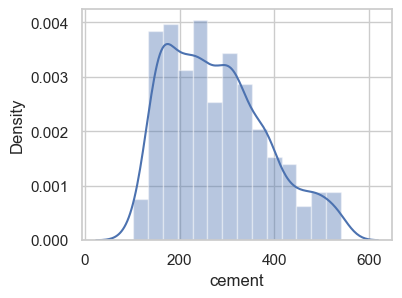

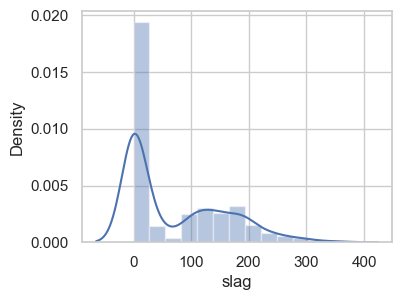

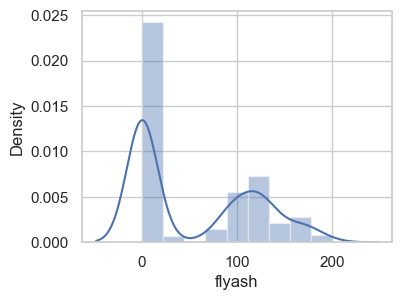

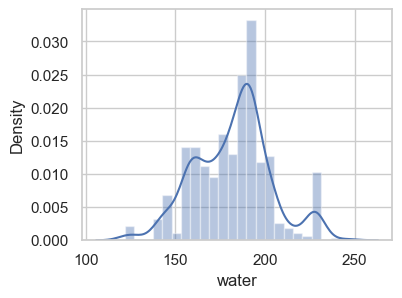

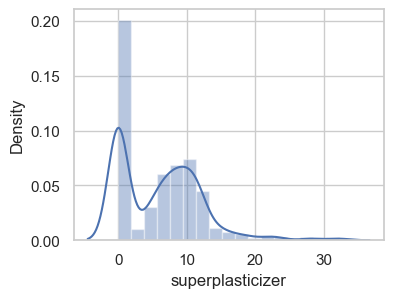

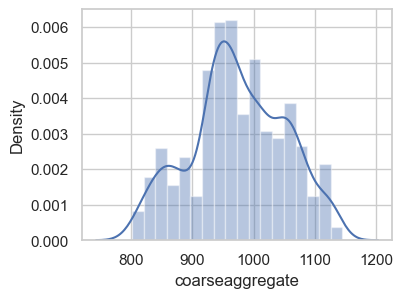

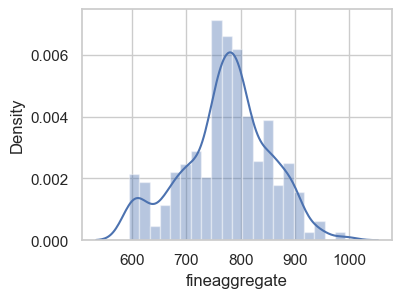

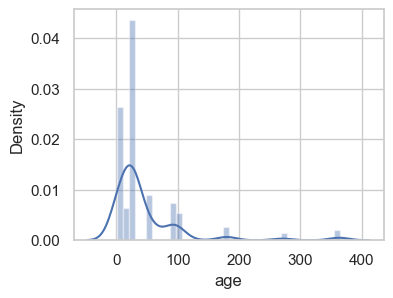

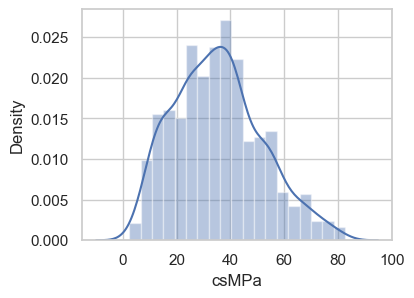

In [63]:
for col in df.columns:
    plt.figure(figsize=(4,3))
    sns.distplot(df[col])
    plt.show()

<Figure size 400x300 with 0 Axes>

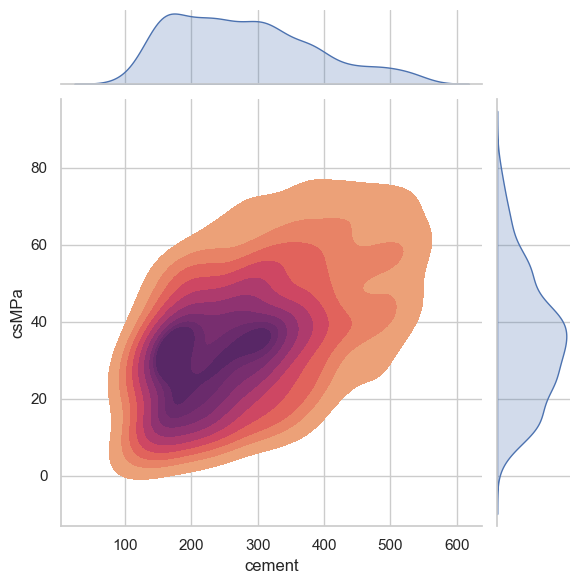

<Figure size 400x300 with 0 Axes>

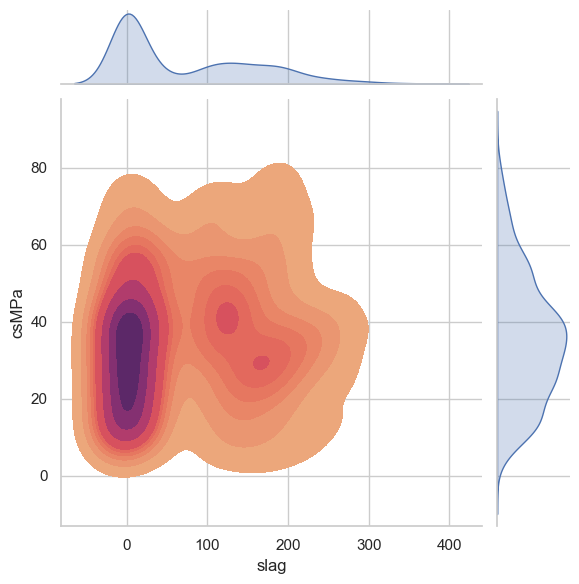

<Figure size 400x300 with 0 Axes>

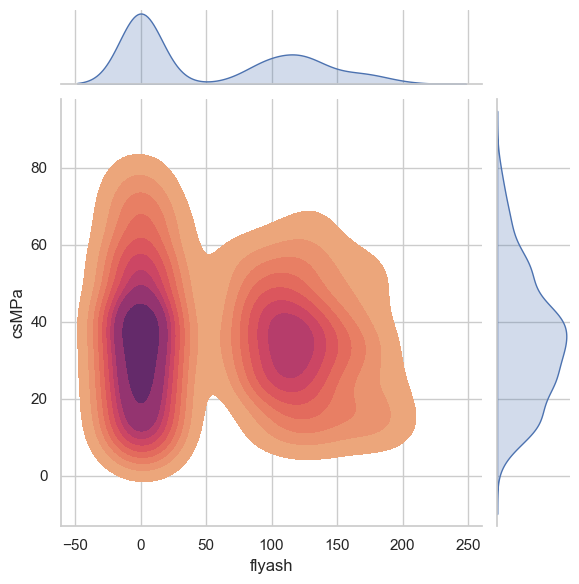

<Figure size 400x300 with 0 Axes>

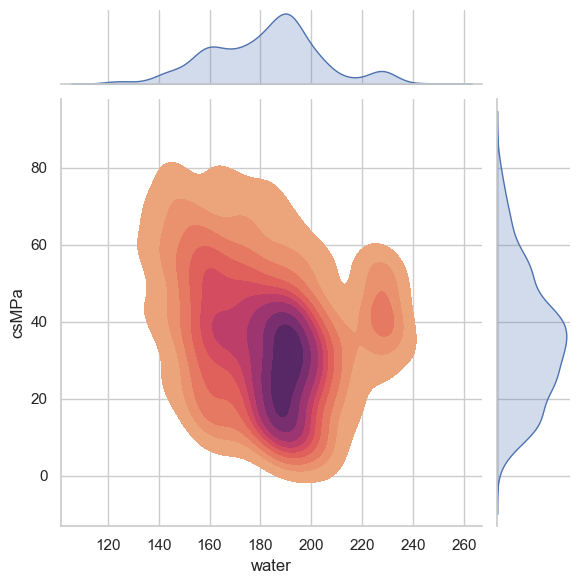

<Figure size 400x300 with 0 Axes>

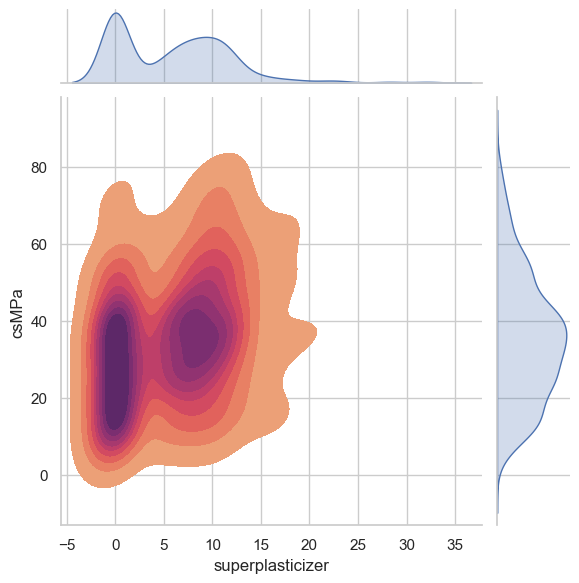

<Figure size 400x300 with 0 Axes>

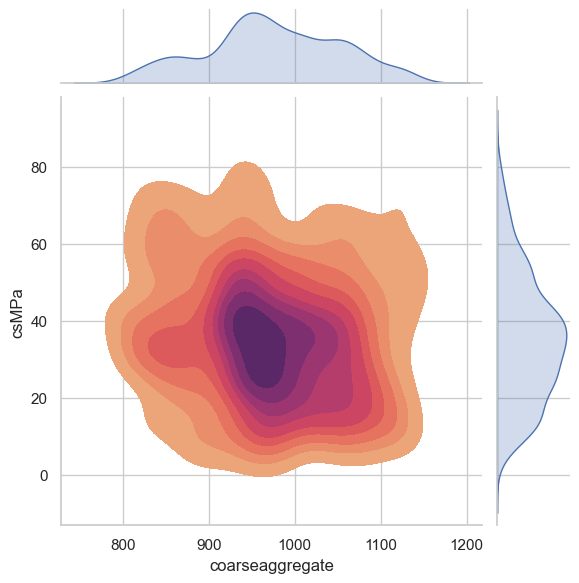

<Figure size 400x300 with 0 Axes>

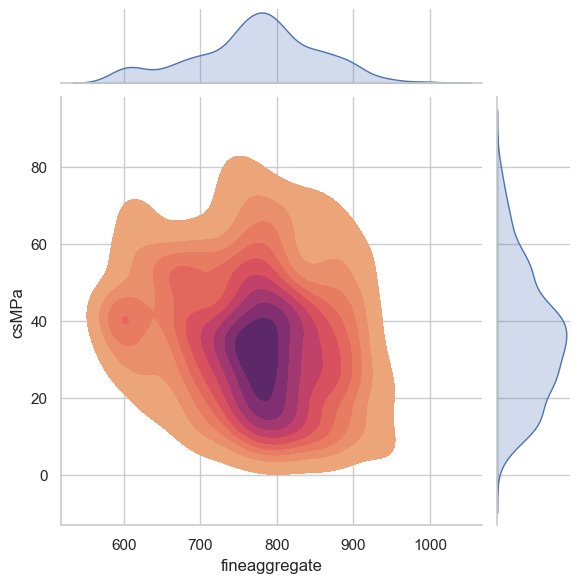

<Figure size 400x300 with 0 Axes>

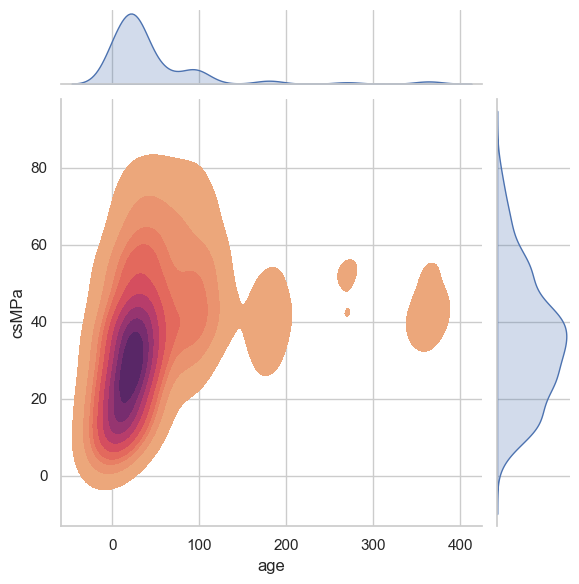

In [64]:
sns.set(style="whitegrid")

cols_without_y = df.drop("csMPa", axis=1).columns
for col in cols_without_y:
    plt.figure(figsize=(4,3))
    sns.jointplot(x=df[col], y=df["csMPa"], kind="kde", cmap="flare", fill=True)
    plt.show()

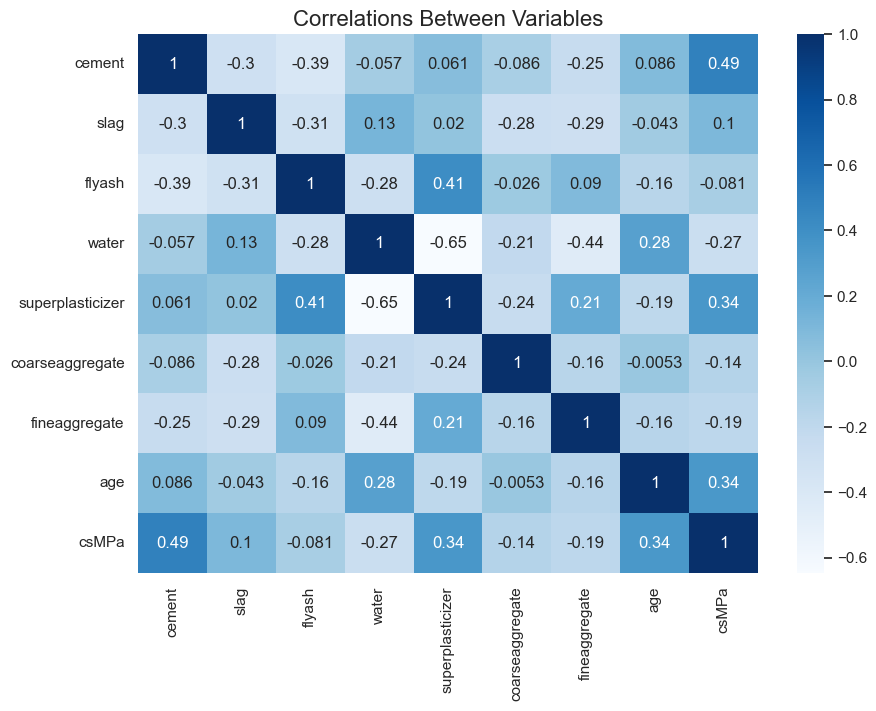

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [66]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [67]:
scaler = StandardScaler()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test=scaler.transform(X_test)

In [71]:
import pickle
pickle.dump(scaler,open("scaling.pkl","wb"))

In [72]:
X_train

array([[ 2.43672824, -0.83765521, -0.87586539, ..., -1.56005896,
         1.48730406, -0.67904126],
       [ 1.89473124, -0.83765521, -0.87586539, ..., -0.52567253,
        -2.21856469, -0.61484971],
       [-0.01044116, -0.83765521,  0.63871136, ...,  0.01676541,
         1.26349284, -0.67904126],
       ...,
       [-1.20514503,  0.84767932,  0.88129245, ..., -1.36716337,
         0.62544536, -0.27784404],
       [-1.08962169,  0.65589988,  1.17829877, ...,  0.42974322,
        -0.33162584,  0.87760394],
       [ 0.07812673,  1.49740484, -0.87586539, ...,  0.414208  ,
         0.37443056, -0.61484971]])

In [73]:
X_test

array([[-1.20803312,  0.84419242, -0.87586539, ...,  0.35077254,
         0.60318789, -0.27784404],
       [-1.49780416,  1.2998139 , -0.87586539, ..., -0.18648699,
         0.32991562, -0.27784404],
       [-1.20514503,  0.34789046, -0.87586539, ..., -1.0952971 ,
         2.09814796,  0.71712506],
       ...,
       [-0.00947847,  0.29907387, -0.49488869, ...,  1.15342534,
         0.11228703,  0.87760394],
       [-0.61982678,  0.30256077, -0.49488869, ...,  1.20909319,
         0.14938281, -0.67904126],
       [ 0.94166369, -0.83765521, -0.87586539, ...,  0.39996739,
        -0.13625472, -0.67904126]])

In [74]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [75]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.895256221464194
MSE: 125.2456480505019
r2 Score: 0.5801703029028777
RMSE (Cross Validated): 10.983075882282833


In [77]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(gbr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)


MAE: 4.119547654668619
MSE: 31.366731216473333
r2 Score: 0.8948571429785015
RMSE (Cross Validated): 9.151548262332085


In [78]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 2.6353543050965262
MSE: 17.502630012424277
r2 Score: 0.9413303059156503
RMSE (Cross Validated): 9.321425688165979


In [79]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.34430876897251
MSE: 119.3094691607769
r2 Score: 0.6000686724189401
RMSE (Cross Validated): 14.876509668991156


In [80]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 3.5177628358208985
MSE: 26.45261631022033
r2 Score: 0.9113295027347523
RMSE (Cross Validated): 10.237557429821827


In [81]:
models.sort_values(by="RMSE (Cross Validated)")

,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
1,GradientBoostingRegressor,4.119548,31.366731,0.894857,9.151548
2,XGBRegressor,2.635354,17.502630,0.941330,9.321426
4,RandomForestRegressor,3.517763,26.452616,0.911330,10.237557
0,LinearRegression,8.895256,125.245648,0.580170,10.983076
3,SVR,8.344309,119.309469,0.600069,14.876510


<h2>Hypertuning models</h2>

In [82]:
tuned_models = pd.DataFrame(columns=["Tuned Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [83]:
# svr_grid_params = {"kernel": ["linear", "rbf"],
#                    "C": [1, 10, 100, 1000],
#                    "epsilon": [0.001, 0.01, 0.1, 1, 10, 100],
#                    "gamma": [0.001, 0.01, 0.1, 1]}

# svr_grid = GridSearchCV(SVR(), svr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

# svr_grid.fit(X_train, y_train)
# svr_params = svr_grid.best_params_
# print(svr_params)


In [84]:
tuned_svr = SVR(C=1000, epsilon= 1, gamma= 0.1, kernel= 'rbf')
tuned_svr.fit(X_train, y_train)
predictions = tuned_svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 3.9987791020789016
MSE: 39.299573272808864
r2 Score: 0.8682658583353197
RMSE (Cross Validated): 16.341663557391236


In [85]:
# rfr_grid_params = {"n_estimators": [100, 200, 500],
#                    "max_depth": [None, 2, 3, 5],
#                    "min_samples_split": [2, 5, 10],
#                    "min_samples_leaf": [1, 2, 5]}

# rfr_grid = GridSearchCV(RandomForestRegressor(), rfr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

# rfr_grid.fit(X_train, y_train)
# rfr_params = rfr_grid.best_params_
# print(rfr_params)

In [86]:
tuned_rfr = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
tuned_rfr.fit(X_train, y_train)
predictions = tuned_rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 3.496916430111339
MSE: 26.437658191485113
r2 Score: 0.9113796430993518
RMSE (Cross Validated): 10.068000260435545


In [87]:

# gbr_grid_params={'n_estimators':[500,1000,2000],
#                  'learning_rate':[.001,0.01,.1],
#                  'max_depth':[1,2,4],
#                  'subsample':[.5,.75,1],
#                  'random_state':[0,1]}
# gbr_grid=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=gbr_grid_params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)

In [88]:
# gbr_grid.fit(X_train, y_train)
# gbr_params = gbr_grid.best_params_
# print(gbr_params)

In [89]:
tuned_gbr = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, n_estimators= 2000, random_state= 1, subsample= 0.5)
tuned_gbr.fit(X_train, y_train)
predictions = tuned_gbr.predict(X_test)
mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_gbr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 2.7754587809372357
MSE: 18.14820090496996
r2 Score: 0.9391663198890627
RMSE (Cross Validated): 8.922536828699341


In [90]:
tuned_models.sort_values(by='RMSE (Cross Validated)')

,Tuned Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
2,GradientBoostingRegressor,2.775459,18.148201,0.939166,8.922537
1,RandomForestRegressor,3.496916,26.437658,0.911380,10.068000
0,SVR,3.998779,39.299573,0.868266,16.341664


In [91]:
import pickle
# open a file, where you ant to store the data
file = open('gbr.pkl', 'wb')

# dump information to that file
pickle.dump(tuned_gbr, file)